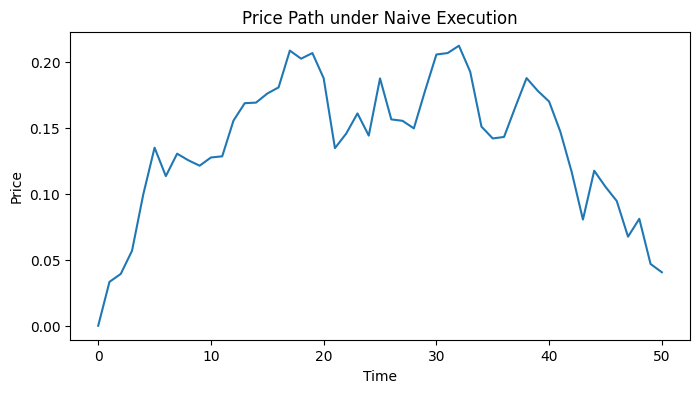

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

T = 50
Q = 100000
sigma = 0.02
eta = 1e-6

v_naive = np.ones(T) * Q/T
S = np.zeros(T+1)

for t in range(T):
    S[t+1] = S[t] + sigma*np.random.randn() - eta*v_naive[t]

plt.figure(figsize=(8,4))
plt.plot(S)
plt.title("Price Path under Naive Execution")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [4]:
# Execution cost and risk calculation for naive strategy

x = Q - np.cumsum(v_naive)

execution_cost = np.sum(v_naive * S[:-1])
risk = np.sum(x**2)

print("Naive Execution Cost:", execution_cost)
print("Naive Risk Term:", risk)


Naive Execution Cost: 13986.19553375839
Naive Risk Term: 161700000000.0


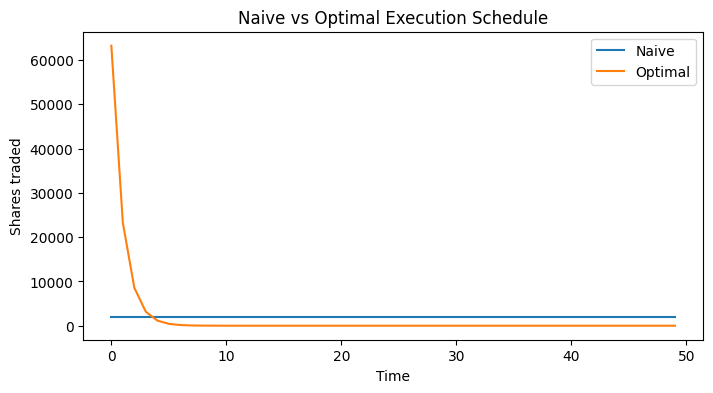

In [7]:
lam = 1e-6  # risk aversion
kappa = np.sqrt(lam / eta)

t = np.arange(T)
v_opt = np.sinh(kappa*(T - t))
v_opt = v_opt / np.sum(v_opt) * Q   # normalize

plt.figure(figsize=(8,4))
plt.plot(v_naive, label="Naive")
plt.plot(v_opt, label="Optimal")
plt.legend()
plt.title("Naive vs Optimal Execution Schedule")
plt.xlabel("Time")
plt.ylabel("Shares traded")
plt.show()


In [10]:
# Simulate price paths for optimal execution

S_opt = np.zeros(T+1)

for t in range(T):
    S_opt[t+1] = S_opt[t] + sigma*np.random.randn() - eta*v_opt[t]

# Remaining inventory
x_naive = Q - np.cumsum(v_naive)
x_opt   = Q - np.cumsum(v_opt)

# Execution cost
cost_naive = np.sum(v_naive * S[:-1])
cost_opt   = np.sum(v_opt * S_opt[:-1])

# Risk term
risk_naive = np.sum(x_naive**2)
risk_opt   = np.sum(x_opt**2)

print("Naive Cost:", cost_naive)
print("Optimal Cost:", cost_opt)
print("\nNaive Risk:", risk_naive)
print("Optimal Risk:", risk_opt)


Naive Cost: 13986.19553375839
Optimal Cost: -3335.8047326848555

Naive Risk: 161700000000.0
Optimal Risk: 1565176427.4966557


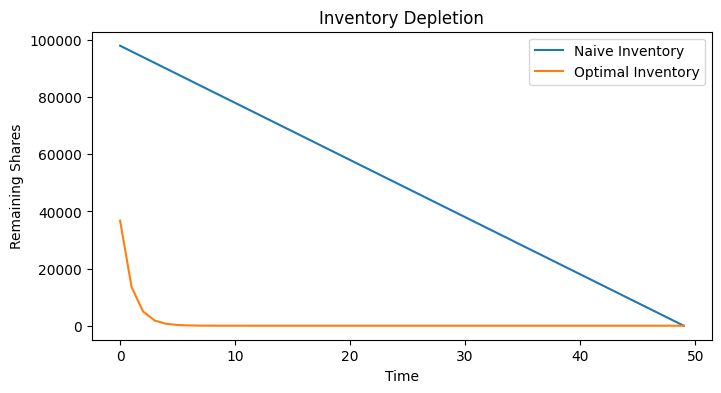

In [13]:
plt.figure(figsize=(8,4))
plt.plot(x_naive, label="Naive Inventory")
plt.plot(x_opt, label="Optimal Inventory")
plt.legend()
plt.title("Inventory Depletion")
plt.xlabel("Time")
plt.ylabel("Remaining Shares")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4e80ecd-af08-4c5a-8f0a-c8c46b34deb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>